 # Food Delivery Demand Forecasting 

load the dataset

In [1]:
import pandas as pd

df=pd.read_csv("order_history_kaggle_data.csv")

checking the basic info

In [2]:
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [3]:
df.shape

(21321, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


In [5]:
df.describe()

,Restaurant ID,Order ID,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes)
count,2.132100e+04,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,2491.000000,133.000000,3.0,21026.000000,21153.000000
mean,2.074413e+07,6.354622e+09,750.076838,32.564592,65.091816,31.795058,0.099128,3.039324,682.616113,4.356885,356.409549,0.0,17.332960,4.825070
std,2.447193e+05,1.230263e+08,498.759428,22.235898,85.401604,131.487091,3.264261,17.070780,465.313977,1.181472,328.128240,0.0,6.283388,4.982591
min,2.032061e+07,6.086767e+09,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1.000000,83.580000,0.0,0.000000,0.100000
25%,2.063570e+07,6.250751e+09,459.000000,18.450000,0.000000,0.000000,0.000000,0.000000,387.450000,4.000000,191.950000,0.0,13.380000,1.000000
50%,2.065987e+07,6.357715e+09,629.000000,28.450000,80.000000,0.000000,0.000000,0.000000,597.450000,5.000000,272.580000,0.0,16.330000,3.100000
75%,2.088265e+07,6.456827e+09,899.000000,39.950000,100.000000,0.000000,0.000000,0.000000,837.900000,5.000000,397.840000,0.0,20.050000,7.400000
max,2.152306e+07,6.573392e+09,16080.000000,603.000000,4020.000000,7787.000000,280.100000,554.800000,12663.000000,5.000000,3236.980000,0.0,90.870000,73.800000


In [6]:
df.isnull().sum()

Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold discount                           

In [7]:
df.duplicated().sum()

np.int64(0)

handling missing value

In [8]:
drop_cols = [ 'Instructions','Review','Rating','Customer complaint tag','Cancellation / Rejection reason','Restaurant compensation (Cancellation)',
    'Restaurant penalty (Rejection)','Discount construct','Restaurant discount (Promo)','Restaurant discount (Flat offs, Freebies & others)','Gold discount','Brand pack discount']

df = df.drop(columns=drop_cols)


In [9]:
# Fill numeric columns with median
numeric_cols = [
    'KPT duration (minutes)',
    'Rider wait time (minutes)'
]

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [10]:
df.isnull().sum()


Restaurant ID                0
Restaurant name              0
Subzone                      0
City                         0
Order ID                     0
Order Placed At              0
Order Status                 0
Delivery                     0
Distance                     0
Items in order               0
Bill subtotal                0
Packaging charges            0
Total                        0
KPT duration (minutes)       0
Rider wait time (minutes)    0
Order Ready Marked           0
Customer ID                  0
dtype: int64

Convert order timestamp to datetime

In [11]:
df['Order Placed At'] = pd.to_datetime(
    df['Order Placed At'],
    format="%I:%M %p, %B %d %Y",
    errors='coerce'
)

# Check conversion success
df['Order Placed At'].isnull().sum()

print(df[['Order Placed At']].head())

      Order Placed At
0 2024-09-10 23:38:00
1 2024-09-10 23:34:00
2 2024-09-10 15:52:00
3 2024-09-10 15:45:00
4 2024-09-10 15:04:00


Create Date Columns

In [12]:
# Extract date (daily aggregation level)
df['order_date'] = df['Order Placed At'].dt.date

# Convert back to datetime for time-series ops
df['order_date'] = pd.to_datetime(df['order_date'])

df[['Order Placed At', 'order_date']].head()


,Order Placed At,order_date
0,2024-09-10 23:38:00,2024-09-10
1,2024-09-10 23:34:00,2024-09-10
2,2024-09-10 15:52:00,2024-09-10
3,2024-09-10 15:45:00,2024-09-10
4,2024-09-10 15:04:00,2024-09-10


Zone Cleaning & Standardization

In [13]:
# Standardize delivery zones
df['zone'] = (
    df['Subzone']
    .str.strip()
    .str.lower()
    .str.replace('-', ' ')
    .str.replace('_', ' ')
    .str.replace(r'\s+', ' ', regex=True)
)

df['zone'].nunique(), df['zone'].unique()[:10]


(8,
 array(['sector 4', 'greater kailash 2 (gk2)', 'dlf phase 1', 'sector 135',
        'vasant kunj', 'shahdara', 'sikandarpur', 'chittaranjan park'],
       dtype=object))

Aggregate to Daily Demand

In [14]:
# Aggregate to daily demand per zone
daily_df = (
    df.groupby(['order_date', 'zone'])['Order ID']
    .count()
    .reset_index()
    .rename(columns={'Order ID': 'orders'})
)

daily_df.head()


,order_date,zone,orders
0,2024-09-01,dlf phase 1,9
1,2024-09-01,greater kailash 2 (gk2),48
2,2024-09-01,sector 135,27
3,2024-09-01,sector 4,48
4,2024-09-01,vasant kunj,9


basic validation

In [15]:
print("Date range:", daily_df['order_date'].min(), "to", daily_df['order_date'].max())
print("Number of zones:", daily_df['zone'].nunique())
print("Total records:", daily_df.shape[0])


Date range: 2024-09-01 00:00:00 to 2025-01-31 00:00:00
Number of zones: 8
Total records: 815


Weather data

In [16]:
pip install meteostat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\anusiya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Define Location & Date Range

In [17]:
from meteostat import Point, Daily
from datetime import datetime

# Define Delhi NCR location
delhi = Point(28.6139, 77.2090)

# Get date range from demand data
start_date = daily_df['order_date'].min()
end_date = daily_df['order_date'].max()

start_date, end_date



(Timestamp('2024-09-01 00:00:00'), Timestamp('2025-01-31 00:00:00'))

fetch weather

In [18]:
# Fetch daily weather data
weather_df = Daily(delhi, start_date, end_date)
weather_df = weather_df.fetch()

weather_df.head()


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-09-01,30.9,27.9,35.2,0.0,<NA>,<NA>,4.9,<NA>,1003.5,<NA>
2024-09-02,29.3,26.2,36.3,0.0,<NA>,<NA>,4.7,<NA>,1003.8,<NA>
2024-09-03,31.1,26.9,35.6,23.1,<NA>,<NA>,4.2,<NA>,1003.8,<NA>
2024-09-04,26.8,24.8,36.2,0.8,<NA>,<NA>,3.0,<NA>,1002.9,<NA>
2024-09-05,29.0,23.3,32.4,10.9,<NA>,<NA>,1.4,<NA>,1001.0,<NA>


clean weather columns(keep only helpful columns)

In [19]:
weather_df = weather_df.reset_index()

weather_df = weather_df[['time', 'tavg', 'prcp', 'wspd']]
weather_df.columns = ['order_date', 'avg_temp', 'rainfall', 'wind_speed']

weather_df.head()


,order_date,avg_temp,rainfall,wind_speed
0,2024-09-01,30.9,0.0,4.9
1,2024-09-02,29.3,0.0,4.7
2,2024-09-03,31.1,23.1,4.2
3,2024-09-04,26.8,0.8,3.0
4,2024-09-05,29.0,10.9,1.4


handling missing value in weather data

In [20]:
weather_df.isnull().sum()


order_date    0
avg_temp      0
rainfall      2
wind_speed    0
dtype: int64

In [21]:
weather_df['rainfall'] = weather_df['rainfall'].fillna(0)

merging weather with demand data

In [22]:
final_df = daily_df.merge(
    weather_df,
    on='order_date',
    how='left'
)

final_df.head()


,order_date,zone,orders,avg_temp,rainfall,wind_speed
0,2024-09-01,dlf phase 1,9,30.9,0.0,4.9
1,2024-09-01,greater kailash 2 (gk2),48,30.9,0.0,4.9
2,2024-09-01,sector 135,27,30.9,0.0,4.9
3,2024-09-01,sector 4,48,30.9,0.0,4.9
4,2024-09-01,vasant kunj,9,30.9,0.0,4.9


validating merge

In [23]:
print("Rows before merge:", daily_df.shape[0])
print("Rows after merge:", final_df.shape[0])

final_df.isnull().sum()


Rows before merge: 815
Rows after merge: 815


order_date    0
zone          0
orders        0
avg_temp      0
rainfall      0
wind_speed    0
dtype: int64

checking weather data

In [24]:
final_df[['order_date', 'avg_temp', 'rainfall', 'wind_speed']].drop_duplicates().head(10)


,order_date,avg_temp,rainfall,wind_speed
0,2024-09-01,30.9,0.0,4.9
5,2024-09-02,29.3,0.0,4.7
10,2024-09-03,31.1,23.1,4.2
15,2024-09-04,26.8,0.8,3.0
20,2024-09-05,29.0,10.9,1.4
25,2024-09-06,28.0,37.1,4.2
30,2024-09-07,28.3,0.0,3.5
35,2024-09-08,28.1,2.0,3.1
40,2024-09-09,29.6,0.3,3.1
45,2024-09-10,28.5,0.0,2.0


In [25]:
final_df[['order_date', 'avg_temp']].drop_duplicates().tail(10)


,order_date,avg_temp
773,2025-01-22,16.4
777,2025-01-23,16.8
781,2025-01-24,15.8
785,2025-01-25,15.1
789,2025-01-26,14.2
793,2025-01-27,13.7
797,2025-01-28,13.9
801,2025-01-29,15.1
806,2025-01-30,16.5
811,2025-01-31,17.0


sort data(otherwise time series data break)

In [26]:
final_df = final_df.sort_values(['zone', 'order_date']).reset_index(drop=True)


In [27]:
print(final_df)

    order_date               zone  orders  avg_temp  rainfall  wind_speed
0   2025-01-29  chittaranjan park       1      15.1       0.0         2.8
1   2025-01-30  chittaranjan park       1      16.5       0.0         1.8
2   2024-09-01        dlf phase 1       9      30.9       0.0         4.9
3   2024-09-02        dlf phase 1      17      29.3       0.0         4.7
4   2024-09-03        dlf phase 1      13      31.1      23.1         4.2
..         ...                ...     ...       ...       ...         ...
810 2025-01-01        vasant kunj      16      11.8       0.0         4.7
811 2025-01-02        vasant kunj       5      11.7       0.0         4.2
812 2025-01-03        vasant kunj       7      12.6       0.0         1.1
813 2025-01-04        vasant kunj       7      13.0       0.0         1.7
814 2025-01-05        vasant kunj       3      13.0       0.0         3.8

[815 rows x 6 columns]


Date-Based Features(captures weekly & monthly seasonality)

In [28]:
final_df['day'] = final_df['order_date'].dt.day
final_df['month'] = final_df['order_date'].dt.month
final_df['dayofweek'] = final_df['order_date'].dt.dayofweek
final_df['is_weekend'] = final_df['dayofweek'].isin([5, 6]).astype(int)

final_df[['order_date', 'dayofweek', 'is_weekend']].head()


,order_date,dayofweek,is_weekend
0,2025-01-29,2,0
1,2025-01-30,3,0
2,2024-09-01,6,1
3,2024-09-02,0,0
4,2024-09-03,1,0


flag

In [29]:
# Rain indicator
final_df['is_rainy'] = (final_df['rainfall'] > 0).astype(int)

# Hot day indicator (Delhi context)
final_df['is_hot'] = (final_df['avg_temp'] >= 35).astype(int)

final_df[['avg_temp', 'rainfall', 'is_rainy', 'is_hot']].head()


,avg_temp,rainfall,is_rainy,is_hot
0,15.1,0.0,0,0
1,16.5,0.0,0,0
2,30.9,0.0,0,0
3,29.3,0.0,0,0
4,31.1,23.1,1,0


lag

In [30]:
# Previous day demand
final_df['lag_1'] = final_df.groupby('zone')['orders'].shift(1)

# Demand from 7 days ago
final_df['lag_7'] = final_df.groupby('zone')['orders'].shift(7)

final_df[['zone', 'order_date', 'orders', 'lag_1', 'lag_7']].head(10)


,zone,order_date,orders,lag_1,lag_7
0,chittaranjan park,2025-01-29,1,NaN,NaN
1,chittaranjan park,2025-01-30,1,1.0,NaN
2,dlf phase 1,2024-09-01,9,NaN,NaN
3,dlf phase 1,2024-09-02,17,9.0,NaN
4,dlf phase 1,2024-09-03,13,17.0,NaN
5,dlf phase 1,2024-09-04,17,13.0,NaN
6,dlf phase 1,2024-09-05,11,17.0,NaN
7,dlf phase 1,2024-09-06,51,11.0,NaN
8,dlf phase 1,2024-09-07,11,51.0,NaN
9,dlf phase 1,2024-09-08,14,11.0,9.0


rolling features

In [31]:
# 7-day rolling average demand
final_df['rolling_7'] = (
    final_df.groupby('zone')['orders']
    .shift(1)
    .rolling(window=7)
    .mean()
)

final_df[['zone', 'order_date', 'orders', 'rolling_7']].head(15)


,zone,order_date,orders,rolling_7
0,chittaranjan park,2025-01-29,1,NaN
1,chittaranjan park,2025-01-30,1,NaN
2,dlf phase 1,2024-09-01,9,NaN
3,dlf phase 1,2024-09-02,17,NaN
4,dlf phase 1,2024-09-03,13,NaN
5,dlf phase 1,2024-09-04,17,NaN
6,dlf phase 1,2024-09-05,11,NaN
7,dlf phase 1,2024-09-06,51,NaN
8,dlf phase 1,2024-09-07,11,NaN
9,dlf phase 1,2024-09-08,14,18.428571


In [32]:
final_df.isnull().sum()


order_date     0
zone           0
orders         0
avg_temp       0
rainfall       0
wind_speed     0
day            0
month          0
dayofweek      0
is_weekend     0
is_rainy       0
is_hot         0
lag_1          8
lag_7         45
rolling_7     45
dtype: int64

In [33]:
final_df_model = final_df.dropna().reset_index(drop=True)

final_df_model.shape


(770, 15)

selecting the high demand zone

In [34]:
zone_counts = (
    final_df_model.groupby('zone')['orders']
    .sum()
    .sort_values(ascending=False)
)

zone_counts.head(10)


zone
greater kailash 2 (gk2)    7039
sector 4                   6227
dlf phase 1                3557
sector 135                 2284
vasant kunj                 875
shahdara                    322
Name: orders, dtype: int64

In [35]:
selected_zone = zone_counts.index[0]
selected_zone


'greater kailash 2 (gk2)'

create zone specific dataset

In [36]:
zone_df = final_df_model[final_df_model['zone'] == selected_zone].copy()

zone_df.shape, zone_df.head()


((146, 15),
     order_date                     zone  orders  avg_temp  rainfall  \
 146 2024-09-08  greater kailash 2 (gk2)      44      28.1       2.0   
 147 2024-09-09  greater kailash 2 (gk2)      31      29.6       0.3   
 148 2024-09-10  greater kailash 2 (gk2)      43      28.5       0.0   
 149 2024-09-11  greater kailash 2 (gk2)      75      28.9       6.1   
 150 2024-09-12  greater kailash 2 (gk2)      36      25.7      16.0   
 
      wind_speed  day  month  dayofweek  is_weekend  is_rainy  is_hot  lag_1  \
 146         3.1    8      9          6           1         1       0   57.0   
 147         3.1    9      9          0           0         1       0   44.0   
 148         2.0   10      9          1           0         0       0   31.0   
 149         2.4   11      9          2           0         1       0   43.0   
 150         6.9   12      9          3           0         1       0   75.0   
 
      lag_7  rolling_7  
 146   48.0  48.714286  
 147   32.0  48.142857

defining target and feature

In [37]:
y = zone_df['orders']

In [38]:
feature_cols = [
    'lag_1',
    'lag_7',
    'rolling_7',
    'dayofweek',
    'is_weekend',
    'is_rainy',
    'is_hot',
    'avg_temp',
    'wind_speed'
]

X = zone_df[feature_cols]


time based train/test split

In [39]:
split_date = zone_df['order_date'].quantile(0.8)

train_idx = zone_df['order_date'] <= split_date
test_idx = zone_df['order_date'] > split_date

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

X_train.shape, X_test.shape


((117, 9), (29, 9))

baseline model

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

baseline_preds = X_test['lag_1']

mae_baseline = mean_absolute_error(y_test, baseline_preds)

mse_baseline = mean_squared_error(y_test, baseline_preds)
rmse_baseline = np.sqrt(mse_baseline)

mae_baseline, rmse_baseline


(11.96551724137931, np.float64(15.421659645021885))

Random forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_preds)

mse_rf = mean_squared_error(y_test, rf_preds)
rmse_rf = np.sqrt(mse_rf)

mae_rf, rmse_rf


(9.37551724137931, np.float64(12.430643864923157))

linear regression

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, lr_preds)
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_preds))

mae_lr, rmse_lr


(10.288742362281178, np.float64(13.339005618139423))

decision tree classifier

In [47]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=8,
    random_state=42
)

dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, dt_preds)
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_preds))

mae_dt, rmse_dt


(15.7183908045977, np.float64(20.667199659422952))

result comparison

In [48]:
results = pd.DataFrame({
    'Model': [
        'Baseline (Lag-1)',
        'Linear Regression',
        'Decision Tree',
        'Random Forest'
    ],
    'MAE': [
        mae_baseline,
        mae_lr,
        mae_dt,
        mae_rf
    ],
    'RMSE': [
        rmse_baseline,
        rmse_lr,
        rmse_dt,
        rmse_rf
    ]
})

results


,Model,MAE,RMSE
0,Baseline (Lag-1),11.965517,15.421660
1,Linear Regression,10.288742,13.339006
2,Decision Tree,15.718391,20.667200
3,Random Forest,9.375517,12.430644


comparison of mae

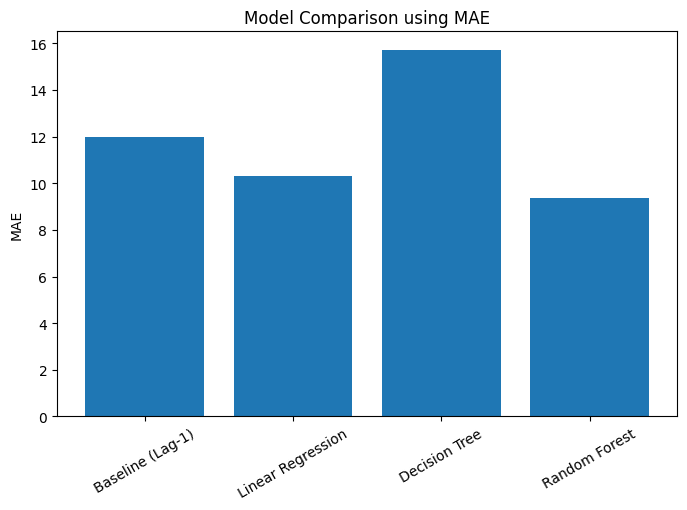

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['MAE'])
plt.title('Model Comparison using MAE')
plt.ylabel('MAE')
plt.xticks(rotation=30)
plt.show()


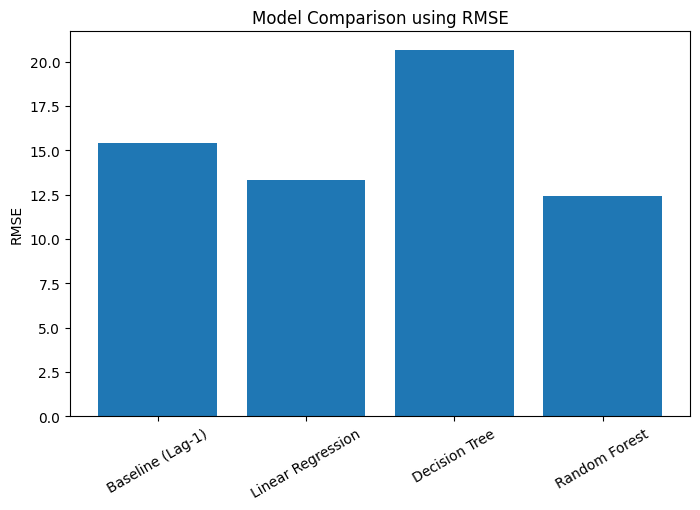

In [51]:
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['RMSE'])
plt.title('Model Comparison using RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=30)
plt.show()


visualization between actual and predicted

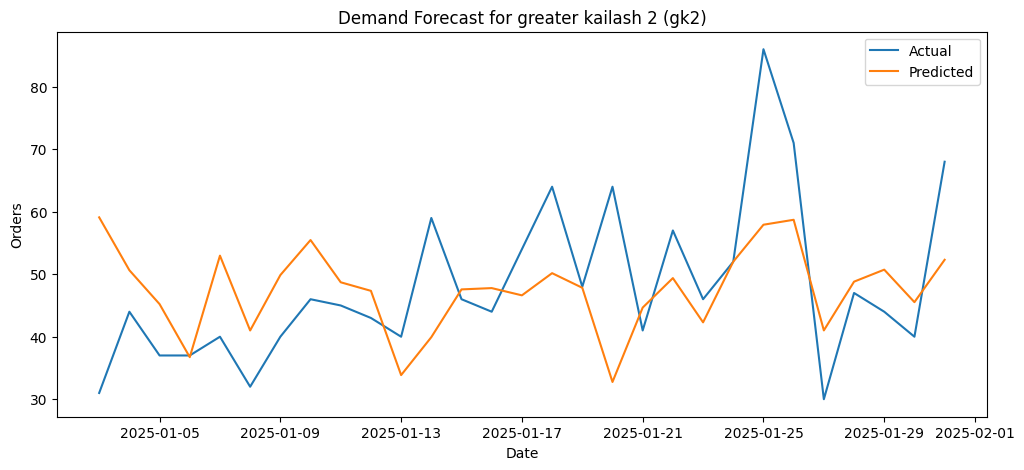

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(zone_df.loc[test_idx, 'order_date'], y_test.values, label='Actual')
plt.plot(zone_df.loc[test_idx, 'order_date'], rf_preds, label='Predicted')
plt.title(f"Demand Forecast for {selected_zone}")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.legend()
plt.show()


Save modeling dataset

In [52]:
# Save the final modeling dataset (for reproducibility)
final_df_model.to_csv("final_df_model.csv", index=False)


Generate forecasts for ALL zones

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

feature_cols = [
    'lag_1',
    'lag_7',
    'rolling_7',
    'dayofweek',
    'is_weekend',
    'is_rainy',
    'is_hot',
    'avg_temp',
    'wind_speed'
]

all_zone_forecasts = []

for zone in final_df_model['zone'].unique():
    zone_df = final_df_model[final_df_model['zone'] == zone].copy()
    zone_df = zone_df.sort_values('order_date')
    
    X = zone_df[feature_cols]
    y = zone_df['orders']
    
    # Time-based split (80% train, 20% test)
    split_date = zone_df['order_date'].quantile(0.8)
    
    train_idx = zone_df['order_date'] <= split_date
    test_idx = zone_df['order_date'] > split_date
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Skip zones with very little data
    if len(X_train) < 15 or len(X_test) == 0:
        continue
    
    rf = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    
    zone_forecast = pd.DataFrame({
        'order_date': zone_df.loc[test_idx, 'order_date'].values,
        'zone': zone,
        'actual_orders': y_test.values,
        'predicted_orders': preds.round(2)
    })
    
    all_zone_forecasts.append(zone_forecast)

forecast_df = pd.concat(all_zone_forecasts, ignore_index=True)

forecast_df.head()


,order_date,zone,actual_orders,predicted_orders
0,2025-01-03,dlf phase 1,19,27.33
1,2025-01-04,dlf phase 1,17,27.10
2,2025-01-05,dlf phase 1,21,23.76
3,2025-01-06,dlf phase 1,17,24.49
4,2025-01-07,dlf phase 1,16,33.32


Generate NEXT-DAY forecast file

In [56]:
next_day_forecasts = []

for zone in final_df_model['zone'].unique():
    zone_df = final_df_model[final_df_model['zone'] == zone].copy()
    zone_df = zone_df.sort_values('order_date')
    
    if len(zone_df) < 15:
        continue
    
    last_row = zone_df.iloc[-1]
    
    X_next = pd.DataFrame([{
        'lag_1': last_row['orders'],
        'lag_7': zone_df.iloc[-7]['orders'] if len(zone_df) >= 7 else last_row['orders'],
        'rolling_7': zone_df['orders'].tail(7).mean(),
        'dayofweek': (last_row['order_date'].dayofweek + 1) % 7,
        'is_weekend': int(((last_row['order_date'].dayofweek + 1) % 7) in [5, 6]),
        'is_rainy': last_row['is_rainy'],
        'is_hot': last_row['is_hot'],
        'avg_temp': last_row['avg_temp'],
        'wind_speed': last_row['wind_speed']
    }])
    
    rf.fit(zone_df[feature_cols], zone_df['orders'])
    next_pred = rf.predict(X_next)[0]
    
    next_day_forecasts.append({
        'zone': zone,
        'forecast_date': last_row['order_date'] + pd.Timedelta(days=1),
        'predicted_orders': round(next_pred, 2)
    })

next_day_df = pd.DataFrame(next_day_forecasts)
next_day_df.to_csv("next_day_zone_forecast.csv", index=False)

next_day_df.head()


,zone,forecast_date,predicted_orders
0,dlf phase 1,2025-02-01,27.74
1,greater kailash 2 (gk2),2025-02-01,59.90
2,sector 135,2025-02-01,15.97
3,sector 4,2025-02-01,50.49
4,shahdara,2025-01-10,5.14


Save Output

In [54]:
forecast_df.to_csv("all_zones_demand_forecast.csv", index=False)

print("Forecast file saved as: all_zones_demand_forecast.csv")


Forecast file saved as: all_zones_demand_forecast.csv
